[*********************100%***********************]  1 of 1 completed


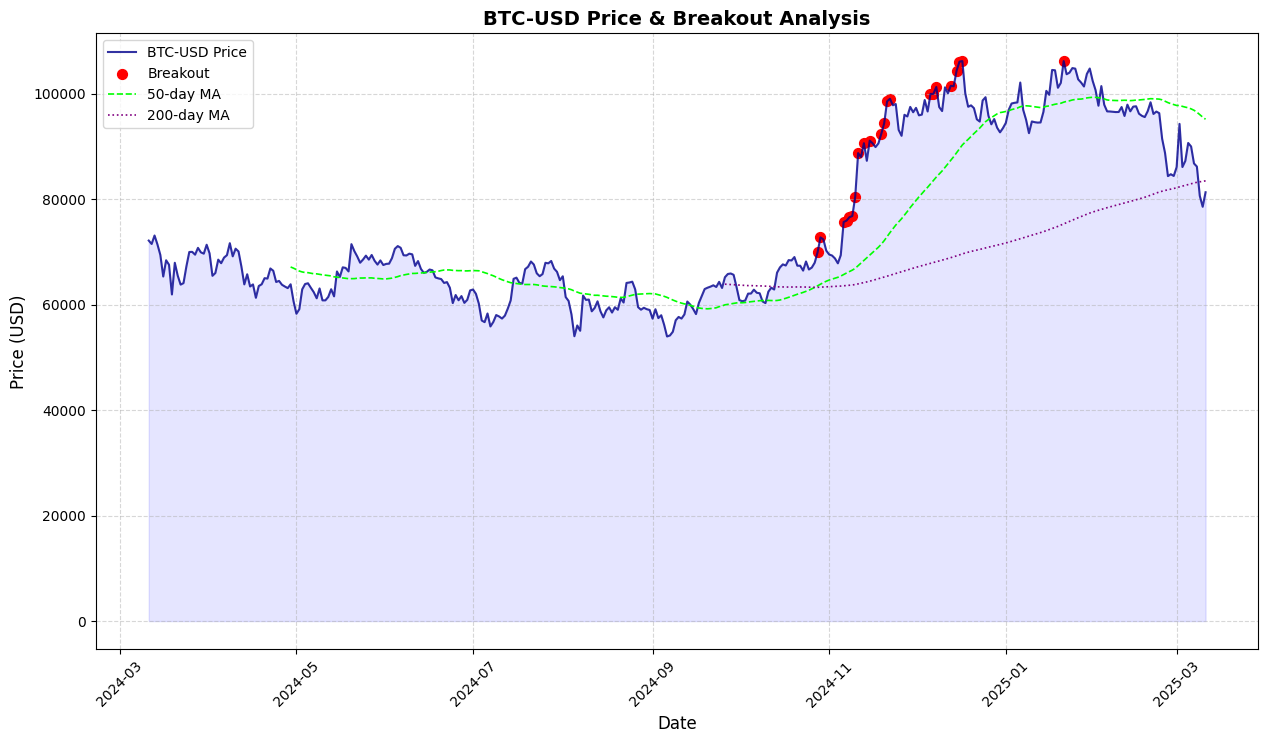

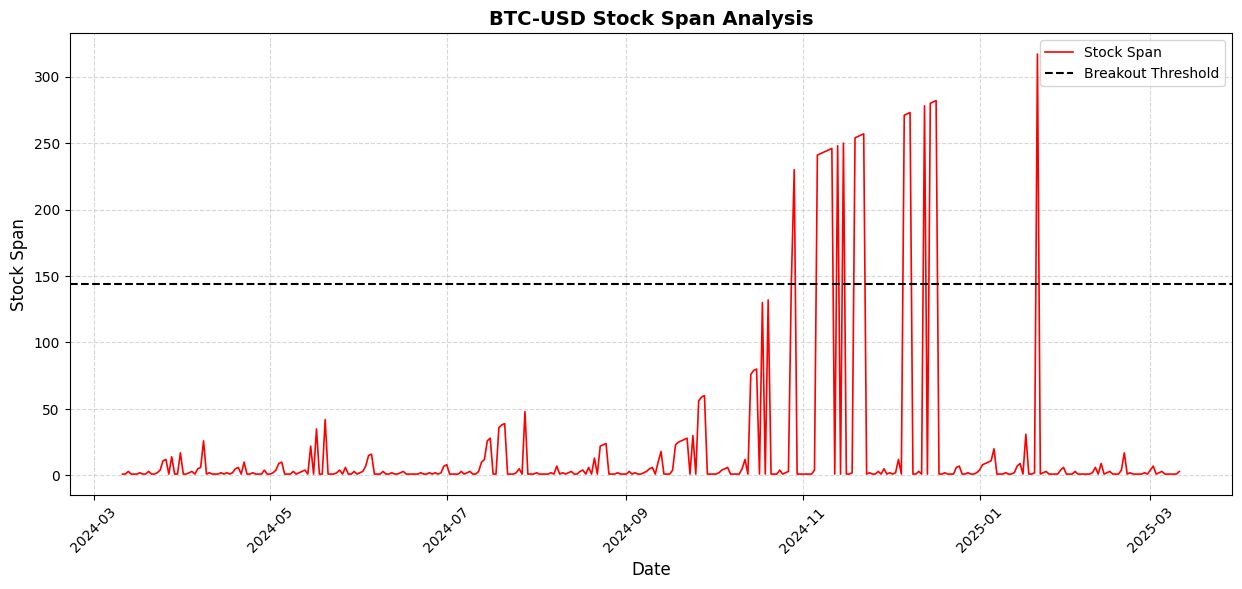


 Breakout Signals Detected on These Dates:
Price        Date Breakout
Ticker                    
0      2024-10-28     True
1      2024-10-29     True
2      2024-11-06     True
3      2024-11-07     True
4      2024-11-08     True
5      2024-11-09     True
6      2024-11-10     True
7      2024-11-11     True
8      2024-11-13     True
9      2024-11-15     True
10     2024-11-19     True
11     2024-11-20     True
12     2024-11-21     True
13     2024-11-22     True
14     2024-12-06     True
15     2024-12-07     True
16     2024-12-08     True
17     2024-12-13     True
18     2024-12-15     True
19     2024-12-16     True
20     2024-12-17     True
21     2025-01-21     True


In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque

# Fetch BTC-USD data
btc = yf.download("BTC-USD", period="1y", interval="1d")

# Ensure data is available
if btc.empty:
    print("No BTC-USD data fetched. Check your internet or ticker symbol.")
    exit()

prices = btc["Close"].values  # Extract closing prices
dates = btc.index  # Extract dates

def calculate_stock_span(prices):
    span = np.zeros(len(prices), dtype=int)
    stack = []  # Stack stores (price, index)
    for i in range(len(prices)):
        while stack and stack[-1][0] <= prices[i]:
            stack.pop()
        span[i] = (i - stack[-1][1]) if stack else (i + 1)
        stack.append((prices[i], i))
    return span

stock_span = calculate_stock_span(prices)

btc["MA_50"] = btc["Close"].rolling(window=50).mean()
btc["MA_200"] = btc["Close"].rolling(window=200).mean()

# Remove trend classification as per assignment requirement
threshold = np.mean(stock_span) + 2 * np.std(stock_span)
btc["Breakout"] = np.where(stock_span > threshold, True, False)

# Plot BTC-USD Price Analysis
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.plot(dates, prices, label="BTC-USD Price", color='darkblue', linewidth=1.5, alpha=0.8)
ax1.fill_between(dates, btc["Close"].to_numpy().reshape(-1), color='blue', alpha=0.1)
ax1.scatter(dates[btc["Breakout"]], btc["Close"].values[btc["Breakout"]], color='red', label='Breakout', marker='o', s=50)
ax1.plot(dates, btc["MA_50"], label="50-day MA", color='lime', linewidth=1.2, linestyle='dashed')
ax1.plot(dates, btc["MA_200"], label="200-day MA", color='purple', linewidth=1.2, linestyle='dotted')

ax1.set_title("BTC-USD Price & Breakout Analysis", fontsize=14, fontweight='bold')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Price (USD)", fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

# Plot Stock Span Analysis Separately
fig, ax2 = plt.subplots(figsize=(15, 6))
ax2.plot(dates, stock_span, label="Stock Span", color='red', linewidth=1.2)
ax2.axhline(y=threshold, color='black', linestyle='dashed', label="Breakout Threshold")
ax2.set_title("BTC-USD Stock Span Analysis", fontsize=14, fontweight='bold')
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Span", fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

# Print only the date and breakout value
breakout_days = btc[btc["Breakout"]]
print("\n Breakout Signals Detected on These Dates:")
print(breakout_days[["Breakout"]].reset_index()[["Date", "Breakout"]])